In [1]:
%cd ..
from src.utils import load_data
from src.algos import *

NUM_STARTS = 5

c:\Users\Rafal.Nojek\Projects\other\essa-tsp-metaheuristics


In [2]:
df = load_data('data\TSP_29.xlsx')

In [3]:
s = SimulatedAnnealing(temp=100, alpha=.9, n_iter=1000, verbose=False)
s.solve(df)

best distance: 2470
algorithm: SIMULATED ANNEALING
n_iter: 1000
solving time: 0.627 s
history: [6355, 5877, 6367, 6315, 6177, 5930, 5898, 5901, 5763, 5767, 5691, 5691, 5606, 5606, 5493, 5317, 5277, 5199, 5131, 4997, 4689, 4670, 4648, 4566, 4358, 4348, 4303, 4246, 4002, 3920, 3916, 3913, 3889, 3662, 3631, 3557, 3557, 3493, 3455, 3455, 3368, 3268, 3260, 3242, 3207, 3171, 3161, 3159, 3138, 3107, 3088, 3078, 3060, 3048, 3040, 2905, 2721, 2700, 2651, 2625, 2622, 2606, 2544, 2543, 2506, 2504, 2504, 2470]

In [4]:
n = NearestNeighbour(verbose=False)
n.solve(df, 14) 

best distance: 2293
algorithm: NEAREST NEIGHBOUR
solving time: 0.030 s

In [5]:
t = TabuSearch(verbose=False, tabu_length=3 , n_iter=30)
t.solve(df)

best distance: 2828
algorithm: TABU SEARCH
n_iter: 30
solving time: 3.891 s
history: [6039, 5314, 4653, 4387, 4151, 3983, 3803, 3678, 3590, 3511, 3455, 3400, 3374, 3348, 3325, 3283, 3273, 3267, 3261, 3138, 3095, 3062, 3046, 2977, 2947, 2922, 2872, 2870, 2851, 2833, 2828]

In [6]:
h = HillClimber(verbose=False, n_iter=25)
h.solve(df)

best distance: 2719
algorithm: HILL CLIMBER
n_iter: 25
solving time: 3.356 s
history: [6736, 5831, 5267, 4730, 4206, 3888, 3655, 3469, 3325, 3193, 3100, 3020, 2973, 2929, 2891, 2869, 2838, 2816, 2796, 2777, 2769, 2727, 2719]

In [7]:
a = MultistartAlgorithm()(HillClimber, df, n_starts=NUM_STARTS, only_best=True, verbose=False, n_iter=25)
a

Parallel time for HILL CLIMBER: 16.544 s


best distance: 2307
algorithm: HILL CLIMBER
n_iter: 25
solving time: 7.031 s
history: [5895, 5156, 4671, 4227, 3888, 3748, 3599, 3399, 3263, 3152, 3064, 3008, 2832, 2783, 2739, 2697, 2656, 2585, 2549, 2520, 2442, 2434, 2401, 2346, 2344, 2307]

In [8]:
b = MultistartAlgorithm()(SimulatedAnnealing, df, n_starts=NUM_STARTS, only_best=True, temp=1000, alpha=.9, n_iter=100, verbose=False)
b

Parallel time for SIMULATED ANNEALING: 6.596 s


best distance: 3331
algorithm: SIMULATED ANNEALING
n_iter: 100
solving time: 0.080 s
history: [5150, 4902, 4901, 5013, 4796, 4921, 5005, 4987, 4987, 5085, 5458, 5436, 5175, 4797, 4771, 4727, 4651, 4693, 4416, 4339, 4364, 4387, 4295, 4246, 4116, 4042, 3931, 3794, 3653, 3579, 3533, 3405, 3331]

In [9]:
c = MultistartAlgorithm()(TabuSearch, df, n_starts=NUM_STARTS, only_best=True, verbose=False, tabu_length=3 , n_iter=30)
c

Parallel time for TABU SEARCH: 8.776 s


best distance: 2095
algorithm: TABU SEARCH
n_iter: 30
solving time: 8.566 s
history: [6656, 5777, 5025, 4505, 4117, 3788, 3493, 3312, 3117, 2955, 2805, 2696, 2539, 2447, 2364, 2325, 2279, 2240, 2161, 2123, 2095, 2082, 2080, 2088, 2102, 2103, 2105, 2097, 2110, 2109, 2095]

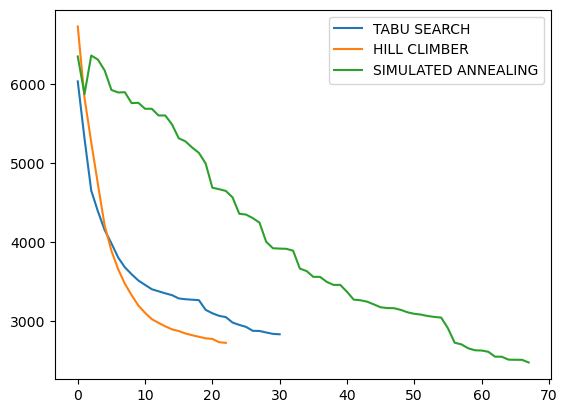

In [10]:
from matplotlib import pyplot as plt
plt.plot(t.history, label=t.NAME)
plt.plot(h.history, label=h.NAME)
plt.plot(s.history, label=s.NAME)
plt.legend()

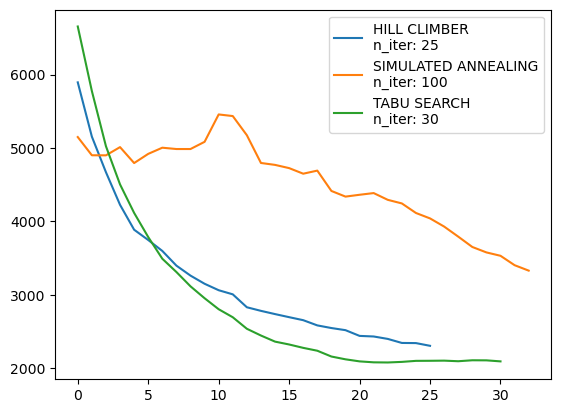

In [11]:
plt.plot(a.distance_history, label=a.algorithm)
plt.plot(b.distance_history, label=b.algorithm)
plt.plot(c.distance_history, label=c.algorithm)
plt.legend()